# Market Basket Analysis Project using Apriori Algorithm
This notebook performs Market Basket Analysis on retail transaction data to identify associations between products.

## Step 1: Import Required Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Step 2: Load the Dataset

In [13]:

data_path = 'Groceries_data.csv'
data = pd.read_csv(data_path)
print('Data shape:', data.shape)
data.head()

Data shape: (38765, 7)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


## Step 3: Data Preprocessing

In [14]:
# Check for nulls
print('Missing values per column:')
print(data.isnull().sum())

# Convert transactions to list of lists
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()
print('Number of transactions:', len(transactions))
print('Example transaction:', transactions[0])

Missing values per column:
Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64
Number of transactions: 14963
Example transaction: ['whole milk', 'pastry', 'salty snack']


## Step 4: One-Hot Encode Transaction Data

In [6]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(14963, 167)

## Step 5: Apply Apriori Algorithm

In [7]:
# Minimum support = 0.01 (1%)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets,length
62,0.157923,(whole milk),1
40,0.122101,(other vegetables),1
46,0.110005,(rolls/buns),1
52,0.097106,(soda),1
63,0.085879,(yogurt),1
47,0.069572,(root vegetables),1
57,0.067767,(tropical fruit),1
5,0.060683,(bottled water),1
49,0.060349,(sausage),1
15,0.053131,(citrus fruit),1


## Step 6: Generate Association Rules

In [8]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules = rules.sort_values(['lift', 'confidence'], ascending=False)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


## Step 7: Visualize Frequent Items

/tmp/ipykernel_9052/351481128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items['itemsets'].astype(str), x=top_items['support'], palette='viridis')


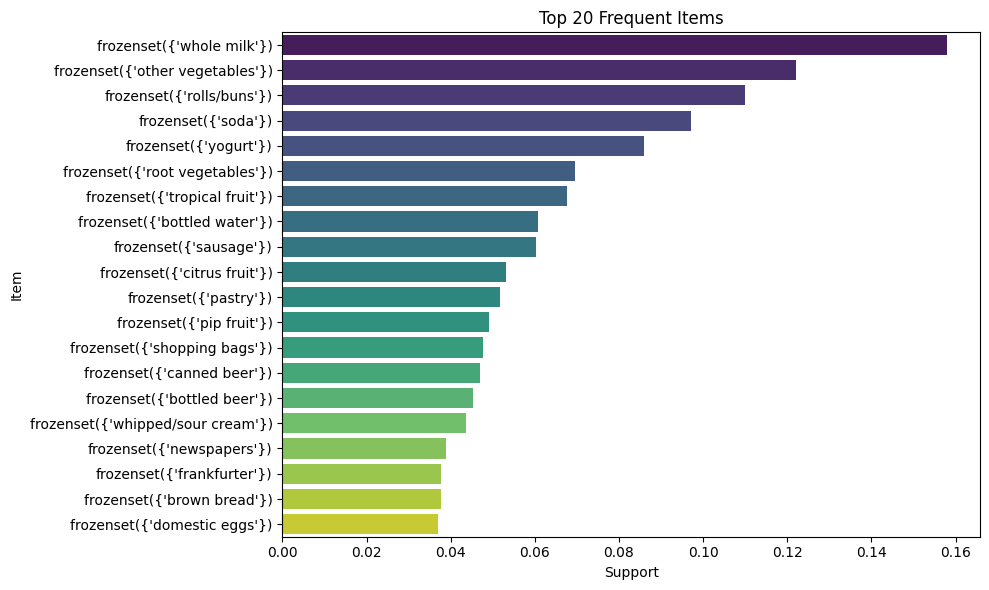

In [9]:
plt.figure(figsize=(10,6))
top_items = frequent_itemsets[frequent_itemsets['length']==1].nlargest(20, 'support')
sns.barplot(y=top_items['itemsets'].astype(str), x=top_items['support'], palette='viridis')
plt.title('Top 20 Frequent Items')
plt.xlabel('Support')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

## Step 8: Visualize Co-occurrence Heatmap

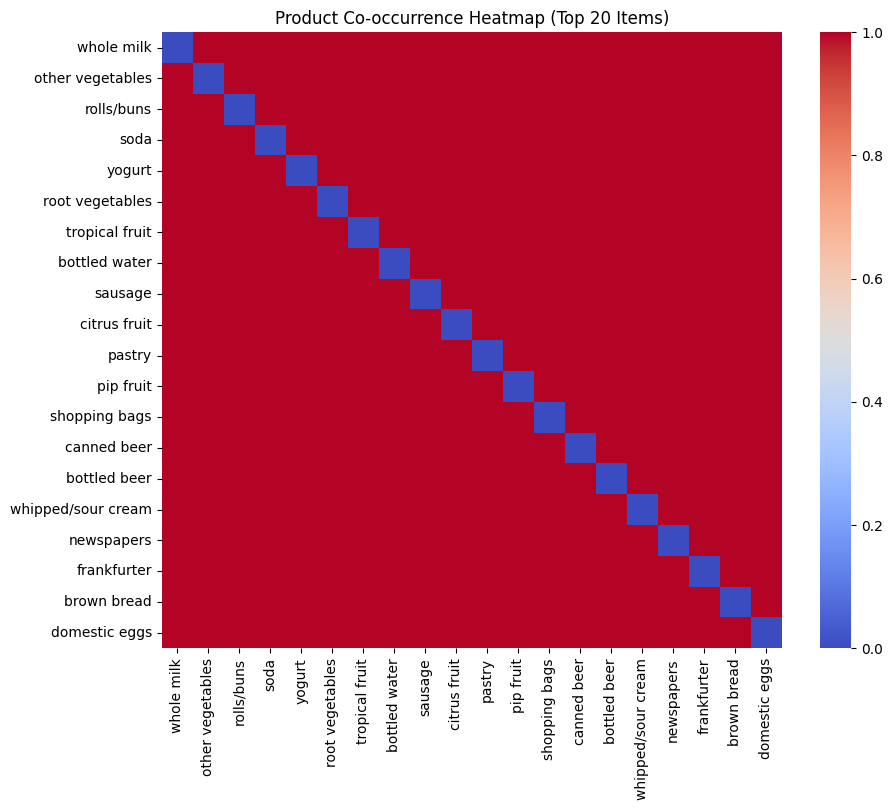

In [10]:
import numpy as np

top_items_names = top_items['itemsets'].apply(lambda x: list(x)[0])
co_occurrence = df[top_items_names].T.dot(df[top_items_names])
np.fill_diagonal(co_occurrence.values, 0)

plt.figure(figsize=(10,8))
sns.heatmap(co_occurrence, cmap='coolwarm', annot=False)
plt.title('Product Co-occurrence Heatmap (Top 20 Items)')
plt.show()